## Linear Regression
#### 1. Predicting housing prices based on various features like size, number of rooms, location, etc.

Step 1: Data Collection
1. We'll use the Boston Housing dataset for this example.
2. Load the Data: Import the dataset using pandas.
3. Data Collection You can use a publicly available dataset, such as the Boston Housing dataset from the UCI Machine Learning Repository or the Kaggle Housing Prices dataset.

In [63]:
# import required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Load data
from sklearn.datasets import load_boston

In [47]:
boston = load_boston()
#boston
#print(boston.DESCR)
df = pd.DataFrame(boston.data, columns= boston.feature_names)
df['PRICE'] = boston.target
df 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Step 2. Data Preparation


1. Explore the Data: Understand the structure, types of features, and any missing values.

2. Clean the Data: Handle missing values, encode categorical variables, and normalize numerical features if necessary.

In [48]:
# Check for missing value
df.isnull().sum()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Step 3. Exploratory Data Analysis (EDA)

Visualize Relationships: Use plots to visualize the relationship between features and the target variable (price).

Correlation Analysis: Check the correlation between different features and the target variable.

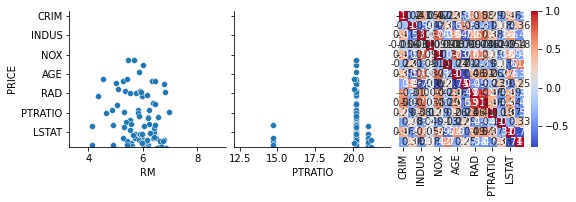

In [49]:
sns.pairplot(df, x_vars=['RM','PTRATIO','LSTAT'], y_vars=['PRICE'])
# correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm')
plt.show()


Step 4. Feature Selection

1. Select Features: Choose the most relevant features for predicting house prices.
2. Create Training and Test Sets: Split the data into training and test sets.

In [50]:
x = df[['RM','PTRATIO','LSTAT']]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Step 5 . Building the Model
1. Import Libraries: Use libraries like scikit-learn to create the model.

2. Train the Model: Fit the linear regression model on the training data.

3. Evaluate the Model: Use metrics like R-squared and Mean Squared Error (MSE) to evaluate the model.

In [51]:
# Creating model variable 
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

Step 6. Model Tuning

1. Hyperparameter Tuning: Fine-tune the model parameters to improve performance.

2. Cross-Validation: Use cross-validation to ensure the model's robustness.

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 27.11495741558058
R-squared: 0.6302528487272827


1. Polynomial Features

Polynomial features allow you to model non-linear relationships by adding polynomial terms of the input features. For example, instead 

of just using the feature x, you can use x, x2 and 3x3


to capture more complex relationships.

In [62]:
x_test_poly = poly.transform(X_test)
y_pred_poly = model.prediction(x_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print('MSE : ', mse_poly)
print('R squared ', r2_poly)

NameError: name 'poly' is not defined

In [64]:
# Creating interaction features manually
df['RM_LSTAT'] = df['RM'] * df['LSTAT']

# Select features including the new interaction term
X = df[['RM', 'LSTAT', 'PTRATIO', 'RM_LSTAT']]
y = df['PRICE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (with Interaction Features): {mse}')
print(f'R-squared (with Interaction Features): {r2}')


Mean Squared Error (with Interaction Features): 20.624568544226506
R-squared (with Interaction Features): 0.7187576086298877


In [65]:
import joblib
joblib.dump(model, 'linear_regression_model.pkl')
loaded_model = joblib.load('linear_regression_model.pkl')
new_predictions = loaded_model.predict(X_test)
print(new_predictions)

[25.5964332  32.16037356 15.62832029 24.55060834 16.57928592 21.43208589
 16.37828393 10.90902231 19.69750152 18.6173991  17.83786157 19.12829317
 14.22392995 20.97296104 18.74901507 23.67909196 16.36313    12.49452039
 43.48975966 15.78321837 25.30920278 26.92755991 12.47684133 23.40060942
 17.10306981 14.83870769 21.47223462 15.90277724 16.9655519  18.05858755
 18.64142003 25.41048493 22.88634049 17.5254551  13.53732026 19.57689534
 34.7675718  20.16930186 18.85798874 24.28718356 14.29478673 28.35923807
 44.72274145 18.08260957 25.08963919 15.71173148 14.60605715 25.98127364
 17.06027946 30.79927472 21.57230479 34.23389932 14.85303497 26.35855449
 40.82808777 21.75964931 16.94858308 32.22675995 23.87839253 15.55459773
 25.16989536 34.26382671 30.48154687 16.92260731 28.62378935 13.98622327
 16.98802238 25.37147886 29.78264754 14.97715525 18.76590633 26.51661719
 12.16349362 22.00312196 22.05876327 10.03340402 19.44843269 41.91579445
 13.65064293 12.71687396 21.59342502 11.26158537 22